<a href="https://colab.research.google.com/github/cherryng/MLcourse/blob/main/H1_Question_2_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 2:
In this part of the assignment you will practice putting together a simple machine learning pipeline and to implement the K-nearest neighbor algorithm. You will familiairze yourselves with different python libraries (scikit-learn, matplotlib, pandas) that are helpful tools for machine learning.

## 1. Preparing the data

In this assignment we will use the Iris Flower Species Dataset. This dataset consists of 3 different types of irise species (Setosa, Versicolour, and Virginica) where we have the following measures for each flower sample: the petal length, the sepal length, the petal width, the sepal width.

Below is an example.




![Drag Racing](https://www.integratedots.com/wp-content/uploads/2019/06/iris_petal-sepal-e1560211020463.png)

This data is stored in a 150x4 numpy array, where 150 is the number of sample flowers and 4 is the measured features for each.  Go through the following steps to download the data.

In [1]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()

# We use pandas dataframe to see the table
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [2]:
# Setosa, Versicolour, and Virginica
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

We use pandas dataframe to see the statistics of this data.

In [3]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In this assignment we only use the first two features (sepal length and width) for easier visualization. We also split the dataset into 2 cohorts for training and testing.

In [4]:
from sklearn.model_selection import train_test_split

X = iris.data[:, :2] # The data matrix 
y = iris.target # The class labels

# We take 20% as test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((120, 2), (30, 2))

Now let's visualize this data to get some sense of the samples. 

No handles with labels found to put in legend.


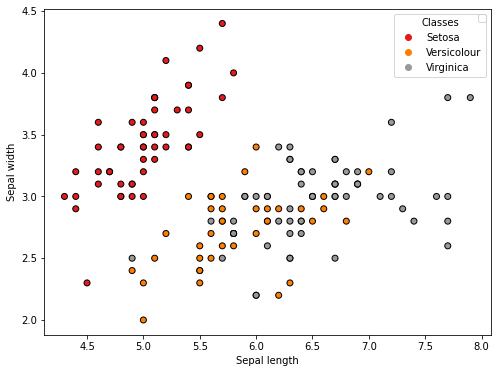

In [5]:
import matplotlib.pyplot as plt

f, axs = plt.subplots(figsize=(8,6))
the_scatter = axs.scatter(X[:, 0], X[:, 1], c=y,
            cmap=plt.cm.Set1, edgecolor='k')

# Change the legend name of the class to be Iris species like Setosa, Versicolour etc...
lines, legend_names = the_scatter.legend_elements()
legend1 = axs.legend(lines, ['Setosa', 'Versicolour', 'Virginica'], title="Classes")
axs.add_artist(legend1)

axs.set_xlabel('Sepal length')
axs.set_ylabel('Sepal width')
axs.legend()

plt.show()

## 2. Implemeting K-Nearest Neighbors
Now we want to implement the K-nearest neighbor algorithm. 

Fill in the code block below for calculating the distance between two vectors.

In [21]:
from math import sqrt

# calculate the Euclidean distance between two vectors
def euclidean_distance(x1, x2):
    distance = sqrt((x1[0] - x2[0])**2 + (x1[1] - x2[1])**2)
    ## TODO: fill in this part of the code to return the euclidean distance 
    ##       between x1 and x2. (hint: you can use sqrt from math library)
    return distance

# This is a helper function to print information on each sample
def print_features(x,y):
    print('Iris type:', ['Setosa', 'Versicolour', 'Virginica'][y-1])
    print('Sepal Length: %.1f \t Sepal Width: %.1f'%(x[0], x[1]))   

Then we calculate the euclidean distance to a test example

In [27]:
# We randomly pick a test example
sample = X_test[2]
print('Test Sample:')
print_features(sample, y_test[10])

# Calculate the euclidean distance to this test example
distances = []
for i, row in enumerate(X_train):
    distance = euclidean_distance(sample, row)
    distances.append((i, distance))
distances.sort(key=lambda tup: tup[1])

k = 2 # Number of nearest neighbors
print('\nTop %d Nearest Neighbors:' % k)
for nn in range(k):
    print_features(X_train[distances[nn][0]], y_train[distances[nn][0]])

Test Sample:
Iris type: Versicolour
Sepal Length: 7.7 	 Sepal Width: 2.6

Top 2 Nearest Neighbors:
Iris type: Versicolour
Sepal Length: 7.7 	 Sepal Width: 2.8
Iris type: Versicolour
Sepal Length: 7.4 	 Sepal Width: 2.8


We can calculate the distance for all the pairs of test examples. For example, if there are **Ntr** training examples and **Nte** test examples, this stage should result in a **Nte x Ntr** matrix where each element (i,j) is the distance between the i-th test and j-th train example.

Text(0, 0.5, 'Test examples id')

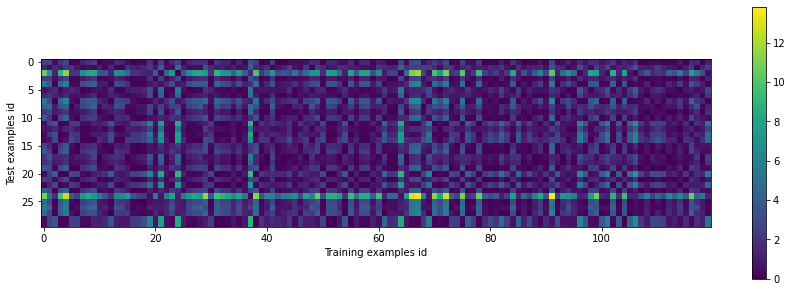

In [24]:
import numpy as np

distances = []
for x_test in X_test:
    distance = np.sum((x_test[np.newaxis, ...] - X_train) ** 2, axis=1)
    distances.append(distance)

distances = np.array(distances)
plt.figure(figsize=(15, 5))
plt.imshow(distances)
plt.colorbar()
plt.xlabel('Training examples id')
plt.ylabel('Test examples id')

### Question 1

Notice the structured patterns in the distance matrix, where some rows or columns are visible brighter.

1.  Which training examples are probably more important for test predictions in a K nearest neighbor classifier? Why? 
2.  Which test examples are closer to most of the training examples?

$\color{blue}{\textit Your Answer:}$ *fill this in.*

1. The training examples that corresponds to bluer columns. that means they have a small distance to the test examples so they are have more similar sepal length and width, hence in principle going to provide a better prediction of what the test example is. 

2. the ones that have more blue in the row. 



Now we will use the scikit learn library to implement a simple KNN. 

In [28]:
from sklearn.neighbors import KNeighborsClassifier

k = 2 # Number of nearest neighbors
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

Let's pick a sample from our test set. Now we want to find the 5 closest neighbors of this sample from the training set. Complete the code segment below to find these samples and print out their features (hint: use kneighbors method for KNeighborsClassifier https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) 



In [29]:
sample = X_test[10]
print('A random sample chosen from the testset:')
print_features(sample, y_test[10])

## TODO: find the 5 closest samples from the training test to "sample"
k = 5 # Number of nearest neighbors
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X_train, y_train)
dists, neighbor_ids = neigh.kneighbors()

print('Closest 5 neighbors to this test sample:')
for knn in range(5):
    print('Neighbor %d ===> distance:%f'%(knn, dists[0][knn]))
    print_features(X_train[neighbor_ids[0][knn]], y_train[neighbor_ids[0][knn]])

A random sample chosen from the testset:
Iris type: Versicolour
Sepal Length: 6.5 	 Sepal Width: 3.2
Closest 5 neighbors to this test sample:
Neighbor 0 ===> distance:0.200000
Iris type: Virginica
Sepal Length: 4.6 	 Sepal Width: 3.4
Neighbor 1 ===> distance:0.282843
Iris type: Virginica
Sepal Length: 4.8 	 Sepal Width: 3.4
Neighbor 2 ===> distance:0.282843
Iris type: Virginica
Sepal Length: 4.8 	 Sepal Width: 3.4
Neighbor 3 ===> distance:0.300000
Iris type: Virginica
Sepal Length: 4.9 	 Sepal Width: 3.6
Neighbor 4 ===> distance:0.400000
Iris type: Virginica
Sepal Length: 4.6 	 Sepal Width: 3.2


We can visualize the decision boundary

In [30]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

h = .02  # step size in the mesh
# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

Text(0, 0.5, 'Sepal width')

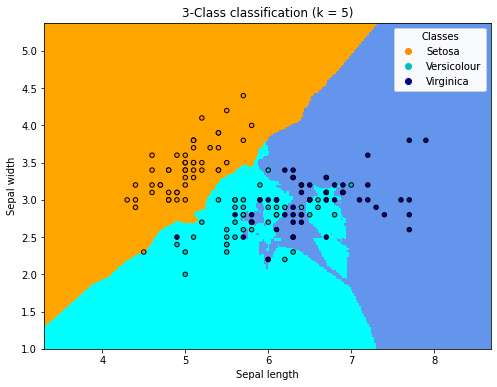

In [31]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots(figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
the_scatter = ax.scatter(
    X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)

# Change the legend name of the class to be Iris species like Setosa, Versicolour etc...
lines, legend_names = the_scatter.legend_elements()
legend1 = ax.legend(lines, ['Setosa', 'Versicolour', 'Virginica'], 
                     title="Classes")
ax.add_artist(legend1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (k))
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

Let's use the KNN to predict on the whole test set and calculate accuracy

In [32]:
y_pred = neigh.predict(X_test)
accuracy = (y_pred == y_test).mean()
print('test accuracy: %f' % accuracy)

test accuracy: 0.800000


We can calculate the test accuracy with respect to different choices of K for K-nearest neighbors.

In [33]:
# Helper function for calculating accuracy
def accuracy(y_pred, y_test):
    accuracy = (y_pred == y_test).mean()
    return accuracy

In [34]:
test_accs = []
for k in range(1, X_train.shape[0]):
    # Create K nearest neighbors classifier
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    
    # Prediction
    y_pred = neigh.predict(X_test)
    
    # Calculate accuracy
    acc = (y_pred == y_test).mean()
    test_accs.append(acc)

Text(0, 0.5, 'Test set accuracy')

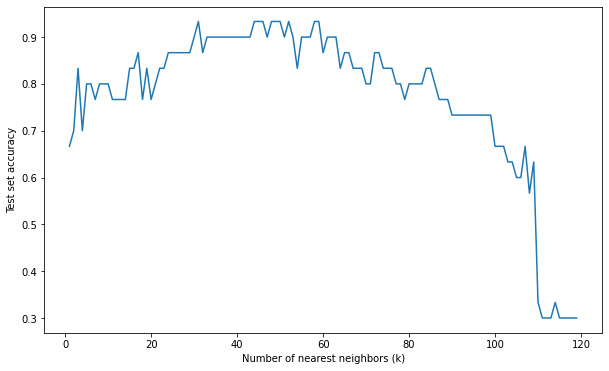

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(list(range(1, X_train.shape[0])), test_accs)
plt.xlabel('Number of nearest neighbors (k)')
plt.ylabel('Test set accuracy')

### Question 2

See from the graph and answer the following questions:

1. Which k gives the best test set accuracy? 
2. When k becomes larger and close to size of the training set, the test set accuracy drops. Why is that? 

$\color{blue}{\textit Your Answer:}$ *fill this in.*

1. According to the plot, it is around k=50. this is somehow a lot larger than the theoretical rule of thumb of sqrt(n_training) =  sqrt(120) ~ 11

2. It is because we are overfitting the data. 

### Question 3

1. Train a KNN classifier for the iris data, but this time use all 4 features instead of only 2. Report on the performance of the model and explain why it is better or worse. What differences do you observe? 

$\color{blue}{\textit Your Answer:}$ *fill this in.*

The overall performance of the model improved. I think it is because the 2 additional features (petal length and width) are quite good classifiers for the 3 types of flower. As we can see from the figure from cell 39 below, the 3 types of flower are well separately into distinct cluster using the petal dimensions, where as earlier when we used the sepal (figure from cell 5), there are quite a bit of overlap between Versicolour and Virginica. For a wide range of k values, we now get an accuracy of essentially 1, whereas when we used only 2 features, the best accuracy was more like 0.95. I am not sure why the new performance plot has these step-like structure, though. it is as if the model performs pretty much equally well up to k=80, and then the performance drops rapidly. i was expecting the outcome to have a peak around k=11 as per the rule of thumb. 

In [37]:
X = iris.data[:, :4] # The data matrix 
y = iris.target # The class labels

# We take 20% as test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((120, 4), (30, 4))

No handles with labels found to put in legend.


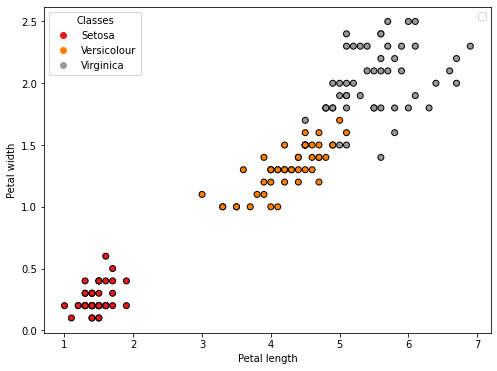

In [39]:
#make a plot to see the 2nd and 3rd features
f, axs = plt.subplots(figsize=(8,6))
the_scatter = axs.scatter(X[:, 2], X[:, 3], c=y,
            cmap=plt.cm.Set1, edgecolor='k')

# Change the legend name of the class to be Iris species like Setosa, Versicolour etc...
lines, legend_names = the_scatter.legend_elements()
legend1 = axs.legend(lines, ['Setosa', 'Versicolour', 'Virginica'], title="Classes")
axs.add_artist(legend1)

axs.set_xlabel('Petal length')
axs.set_ylabel('Petal width')
axs.legend()

plt.show()

In [40]:
# calculate the Euclidean distance between two vectors
def euclidean_distance(x1, x2):
    distance = sqrt((x1[0] - x2[0])**2 + (x1[1] - x2[1])**2 + (x1[2] - x2[2])**2 + (x1[3] - x2[3])**2)
    return distance

# This is a helper function to print information on each sample
def print_features(x,y):
    print('Iris type:', ['Setosa', 'Versicolour', 'Virginica'][y-1])
    print('Sepal Length: %.1f \t Sepal Width: %.1f \t Petal Width: %.1f \t Petal Width: %.1f'%(x[0], x[1], x[2],x[3]))   

In [41]:
# We randomly pick a test example
sample = X_test[10]
print('Test Sample:')
print_features(sample, y_test[10])

# Calculate the euclidean distance to this test example
distances = []
for i, row in enumerate(X_train):
    distance = euclidean_distance(sample, row)
    distances.append((i, distance))
distances.sort(key=lambda tup: tup[1])

k = 2 # Number of nearest neighbors
print('\nTop %d Nearest Neighbors:' % k)
for nn in range(k):
    print_features(X_train[distances[nn][0]], y_train[distances[nn][0]])

Test Sample:
Iris type: Versicolour
Sepal Length: 6.5 	 Sepal Width: 3.2 	 Petal Width: 5.1 	 Petal Width: 2.0

Top 2 Nearest Neighbors:
Iris type: Versicolour
Sepal Length: 6.5 	 Sepal Width: 3.0 	 Petal Width: 5.2 	 Petal Width: 2.0
Iris type: Versicolour
Sepal Length: 6.4 	 Sepal Width: 3.2 	 Petal Width: 5.3 	 Petal Width: 2.3


Text(0, 0.5, 'Test set accuracy')

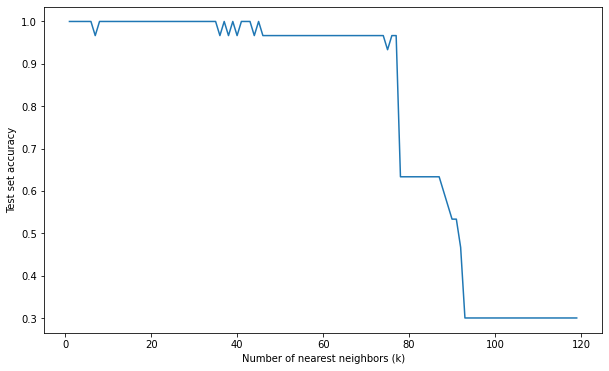

In [43]:
test_accs = []
for k in range(1, X_train.shape[0]):
    # Create K nearest neighbors classifier
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    
    # Prediction
    y_pred = neigh.predict(X_test)
    
    # Calculate accuracy
    acc = (y_pred == y_test).mean()
    test_accs.append(acc)

plt.figure(figsize=(10, 6))
plt.plot(list(range(1, X_train.shape[0])), test_accs)
plt.xlabel('Number of nearest neighbors (k)')
plt.ylabel('Test set accuracy')